In [1]:
import tensorflow as tf
import tensorly as tl
from tensorly import tt_to_tensor
from tensorly.decomposition import tensor_train
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# Example
# Create a tensor of rank 2
tensor = tl.tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

# Decompose the tensor using TTD
factors = tensor_train(tensor, rank=[1,2,1])

# Check that the reverse TT decomposition is the original tensor
check_tensor = tt_to_tensor(factors)
check_tensor

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.41866180e-16, -6.71068805e-16,
        -1.91200728e-16,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00, -2.66444163e-16,
        -2.66444163e-16, -2.66444163e-16,  0.00000000e+00],
       [ 0.00000000e+00,  1.80341980e-17, -7.94900787e-16,
        -3.15032709e-16,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00, -3.90276144e-16,
        -3.90276144e-16, -3.90276144e-16,  0.00000000e+00],
       [ 0.00000000e+00,  2.44390375e-17, -7.88495947e-16,
        -2.53116719e-16,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00, -3.83871305e-16,
        -3.83871305e-16, -3.83871305e-16,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  1.0000000

In [3]:
# ML demo with CIFAR image data set
def tt_decompose_and_flatten(tensor, rank):
    factors = tensor_train(tensor, rank=rank)
    flattened = tl.tt_to_tensor(factors).flatten()
    return flattened

In [4]:
tt_decompose_and_flatten(tensor, 2)

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.41866180e-16, -6.71068805e-16, -1.91200728e-16,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
       -2.66444163e-16, -2.66444163e-16, -2.66444163e-16,  0.00000000e+00,
        0.00000000e+00,  1.80341980e-17, -7.94900787e-16, -3.15032709e-16,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
       -3.90276144e-16, -3.90276144e-16, -3.90276144e-16,  0.00000000e+00,
        0.00000000e+00,  2.44390375e-17, -7.88495947e-16, -2.53116719e-16,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
       -3.83871305e-16, -3.83871305e-16, -3.83871305e-16,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  

In [5]:
import time

In [6]:
# ML demo with CIFAR image data set
def tt_decompose_and_flatten(tensor, rank):
    factors = tensor_train(tensor, rank=rank)
    flattened = tl.tt_to_tensor(factors).flatten()
    return flattened

# load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [7]:
%%time
# normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the labels
y_train, y_test = y_train.flatten(), y_test.flatten()

# select a subset of the data
subset_size = 1000
x_train_subset = x_train[:subset_size]
y_train_subset = y_train[:subset_size]

# apply TT Decomposition to each image in the subset
processed_x_train_subset = np.array([tt_decompose_and_flatten(image, int(tf.rank(image))) for image in x_train_subset])


CPU times: user 666 ms, sys: 255 ms, total: 921 ms
Wall time: 1.42 s


In [8]:
# split subset into training and test sets
X_train, X_val, y_train, y_val = train_test_split(processed_x_train_subset, y_train_subset, test_size=0.2)

# train a simple logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# evaluate the model
accuracy = model.score(X_val, y_val)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.255


In [9]:
epoch = 1
cpu_time = 0
results = {}
reshaped_x_train_subset = x_train_subset
while reshaped_x_train_subset[0].shape[0] >=1 :
    current_dimensions = f"({reshaped_x_train_subset[0].shape[0]}, {reshaped_x_train_subset[0].shape[1]})"
    start = time.time()
    
    # reprocess data
    processed_x_train_subset = np.array([tt_decompose_and_flatten(image, int(tf.rank(image))) for image in reshaped_x_train_subset])
     
        
    # get elapsed time
    duration, cpu_time = time.time()-start, time.process_time()

    # retrain and retest model
    X_train, X_val, y_train, y_val = train_test_split(processed_x_train_subset, y_train_subset, test_size=0.2)
    model.fit(X_train, y_train)
    accuracy = model.score(X_val, y_val)

    # save to results dictionary
    results[current_dimensions] = [accuracy, duration, cpu_time]
    epoch += 1
    print(results)
    
    # reduce dimensions of image before next iteration, if possible
    if (reshaped_x_train_subset[0].shape[0] > 1):  
        reshaped_x_train_subset = np.array([cv2.resize(image, (image.shape[0]//2, image.shape[1]//2)) for image in reshaped_x_train_subset])
    else: break

/Users/Hena/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'(32, 32)': [0.235, 0.6100709438323975, 109.977806]}
{'(32, 32)': [0.235, 0.6100709438323975, 109.977806], '(16, 16)': [0.315, 0.41018199920654297, 212.532509]}
{'(32, 32)': [0.235, 0.6100709438323975, 109.977806], '(16, 16)': [0.315, 0.41018199920654297, 212.532509], '(8, 8)': [0.335, 0.2852950096130371, 234.737768]}
{'(32, 32)': [0.235, 0.6100709438323975, 109.977806], '(16, 16)': [0.315, 0.41018199920654297, 212.532509], '(8, 8)': [0.335, 0.2852950096130371, 234.737768], '(4, 4)': [0.34, 0.23406600952148438, 238.497482]}
{'(32, 32)': [0.235, 0.6100709438323975, 109.977806], '(16, 16)': [0.315, 0.41018199920654297, 212.532509], '(8, 8)': [0.335, 0.2852950096130371, 234.737768], '(4, 4)': [0.34, 0.23406600952148438, 238.497482], '(2, 2)': [0.25, 0.21297097206115723, 240.861017]}
{'(32, 32)': [0.235, 0.6100709438323975, 109.977806], '(16, 16)': [0.315, 0.41018199920654297, 212.532509], '(8, 8)': [0.335, 0.2852950096130371, 234.737768], '(4, 4)': [0.34, 0.23406600952148438, 238.497482]

In [10]:
accuracies = [val[0] for val in list(results.values())]
cpu_times = [val[2] for val in list(results.values())]
runtimes = [val[1] for val in list(results.values())]
x_labels = list(results.keys())

In [11]:
print(cpu_times)

[109.977806, 212.532509, 234.737768, 238.497482, 240.861017, 241.324181]


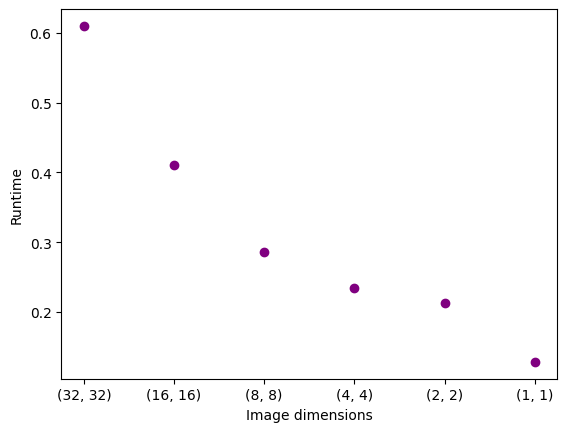

In [12]:
plt.scatter(x_labels, runtimes, color='purple')
plt.xlabel('Image dimensions')
plt.ylabel('Runtime')
plt.savefig('tt_runtimes', bbox_inches='tight', orientation='landscape')

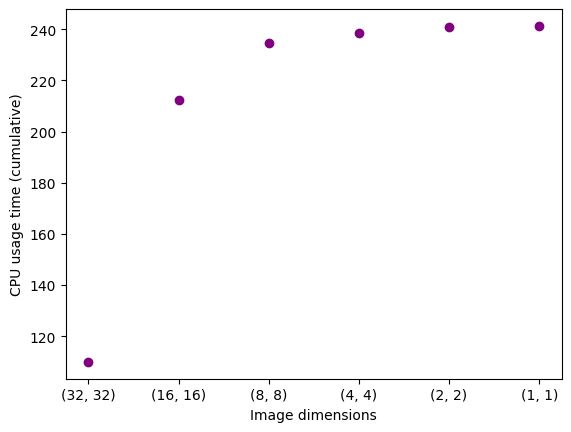

In [13]:
plt.scatter(x_labels,cpu_times,color='purple')
plt.xlabel('Image dimensions')
plt.ylabel('CPU usage time (cumulative)')
plt.savefig('tt_cpu_times', bbox_inches='tight', orientation='landscape')

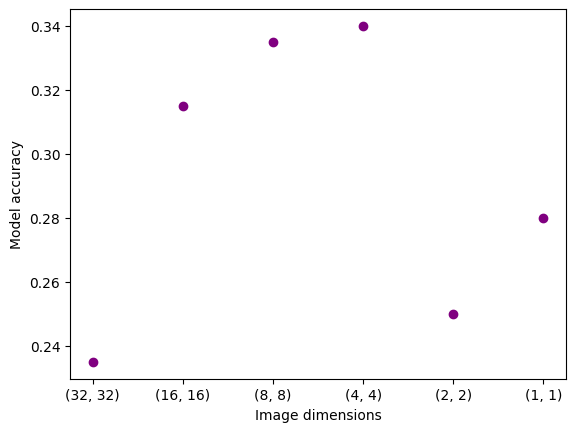

In [14]:
plt.scatter(x_labels,accuracies,color='purple')
plt.xlabel('Image dimensions')
plt.ylabel('Model accuracy')
plt.savefig('tt_accuracies', bbox_inches='tight', orientation='landscape')